In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/coke_utf.csv")

In [13]:
df.head()

,Quarter,Sales,log_coke,t,t_squared,quarter,year,Quarter.2
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,Q1
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,Q2
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,Q3
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,Q4
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,Q1


In [11]:
df.isna().sum()

Quarter      0
Sales        0
log_coke     0
t            0
t_squared    0
Quarter.1    0
year         0
Quarter.2    0
dtype: int64

In [12]:
df.rename(columns={'Quarter.1':'quarter'}, inplace=True)

In [14]:
df = df.drop('Quarter.2', axis=1)

In [15]:
df

,Quarter,Sales,log_coke,t,t_squared,quarter,year
0,Q1_86,1734.827000,3.239256,1,1,Q1,86
1,Q2_86,2244.960999,3.351209,2,4,Q2,86
2,Q3_86,2533.804993,3.403773,3,9,Q3,86
3,Q4_86,2154.962997,3.333440,4,16,Q4,86
4,Q1_87,1547.818996,3.189720,1,1,Q1,87
5,Q2_87,2104.411995,3.323131,2,4,Q2,87
6,Q3_87,2014.362999,3.304138,3,9,Q3,87
7,Q4_87,1991.746998,3.299234,4,16,Q4,87
8,Q1_88,1869.049999,3.271621,1,1,Q1,88
9,Q2_88,2313.631996,3.364294,2,4,Q2,88


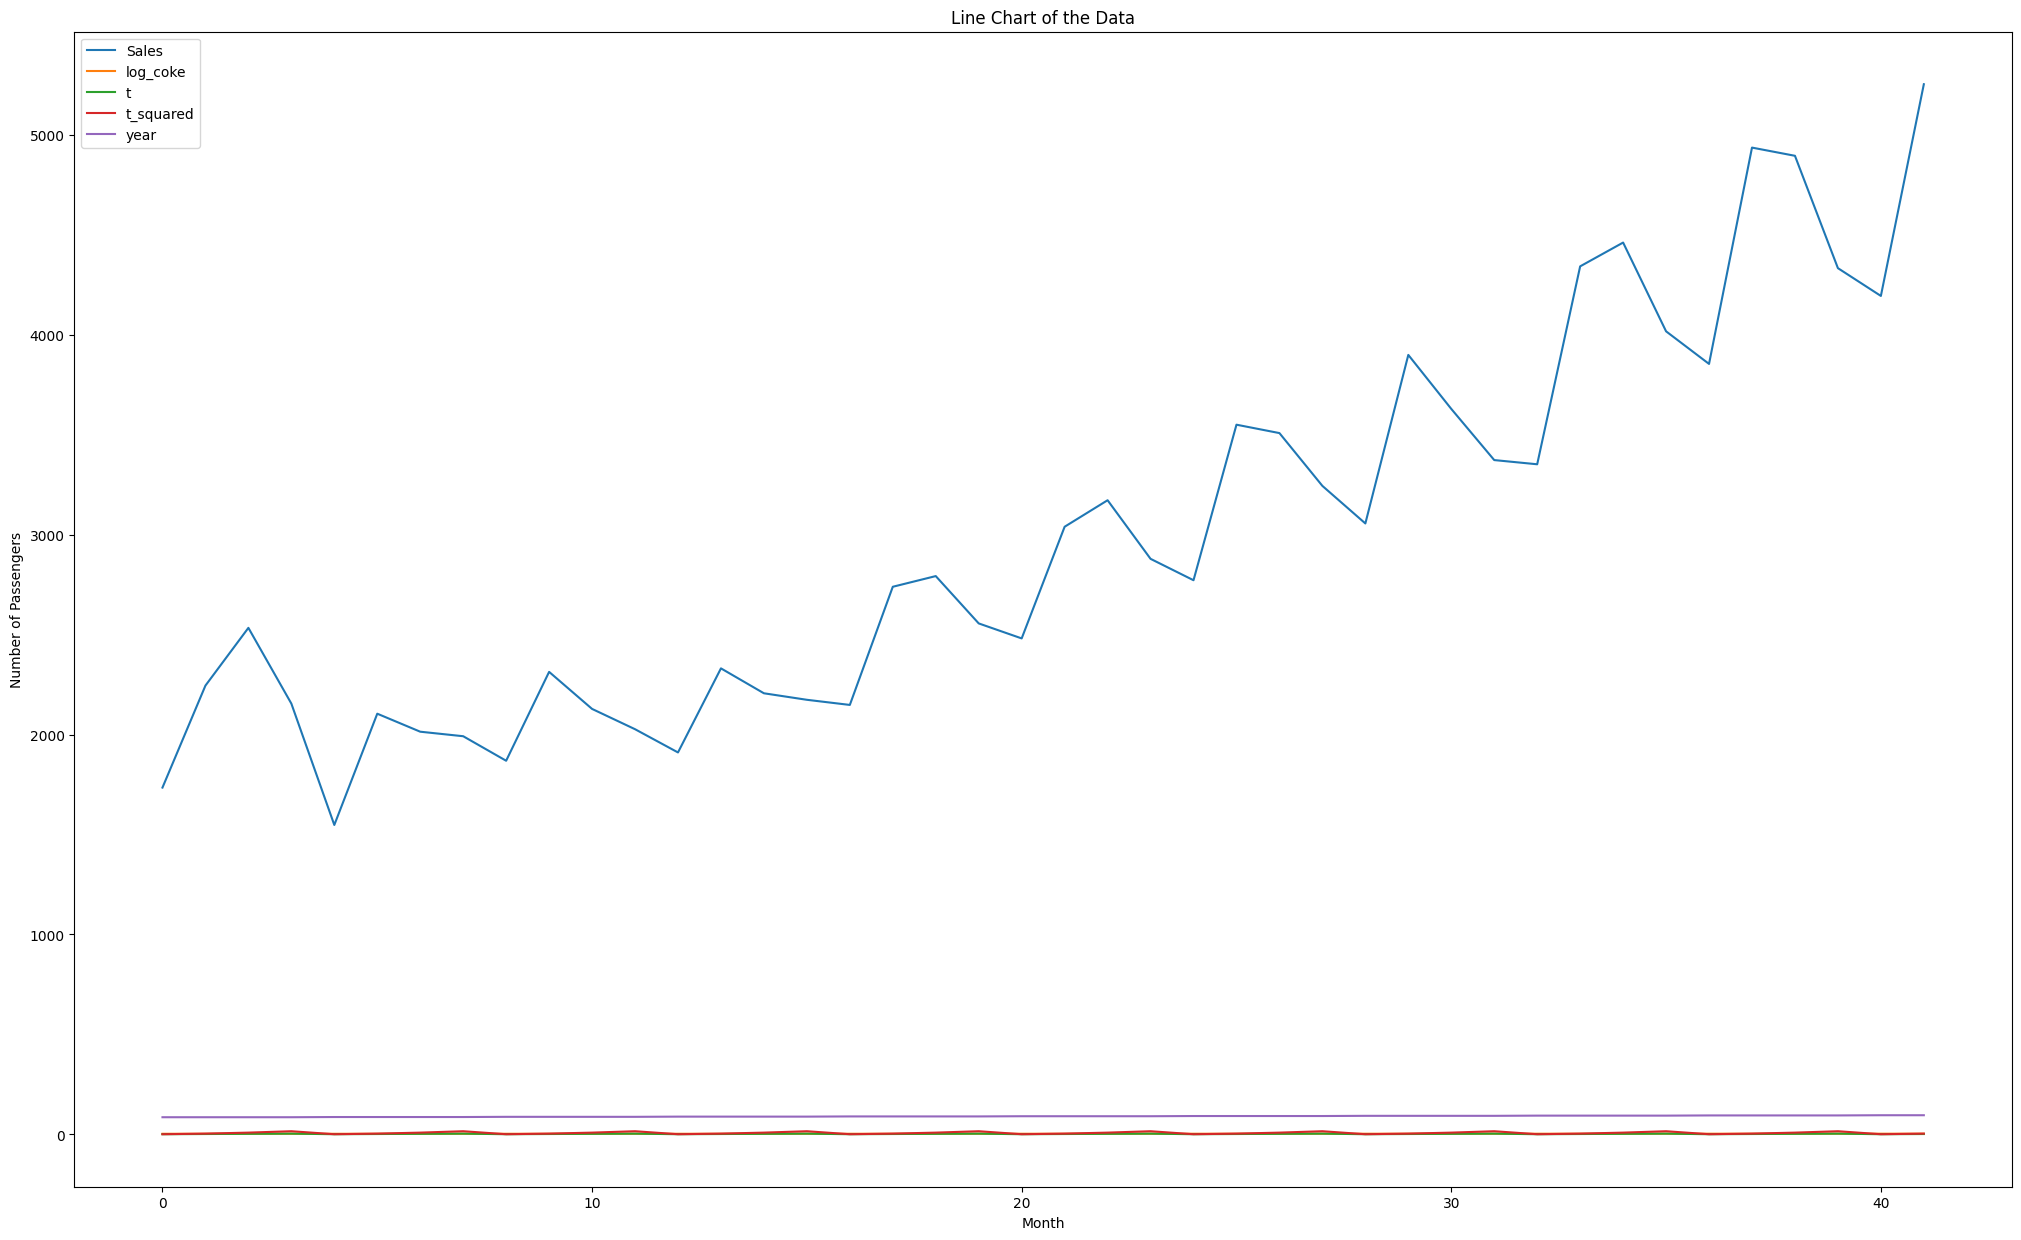

In [26]:
df.plot(kind='line', figsize=(25, 15))
plt.title('Line Chart of the Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.show()

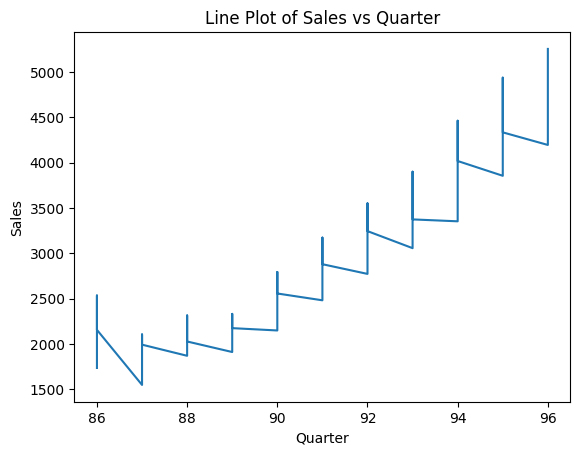

In [24]:
plt.plot(df['year'], df['Sales'])
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Line Plot of Sales vs Quarter')
plt.show()

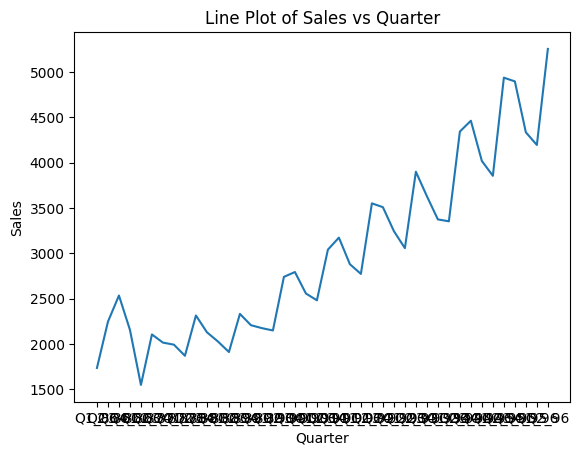

In [21]:
plt.plot(df['Quarter'], df['Sales'])
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Line Plot of Sales vs Quarter')
plt.show()


In [ ]:
### data is non stationery convert it into stationery data

In [27]:
df.head(2)

,Quarter,Sales,log_coke,t,t_squared,quarter,year
0,Q1_86,1734.827000,3.239256,1,1,Q1,86
1,Q2_86,2244.960999,3.351209,2,4,Q2,86


In [28]:
df['diff_sales']=df['Sales'].diff(periods=1)   ## applied diff on pasangers lag=1

In [29]:
df.head()

,Quarter,Sales,log_coke,t,t_squared,quarter,year,diff_sales
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,NaN
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,510.133999
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,288.843994
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,-378.841996
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,-607.144001


In [30]:
df=df.dropna()

In [31]:
df.head()

,Quarter,Sales,log_coke,t,t_squared,quarter,year,diff_sales
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,510.133999
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,288.843994
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,-378.841996
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,-607.144001
5,Q2_87,2104.411995,3.323131,2,4,Q2,87,556.592999


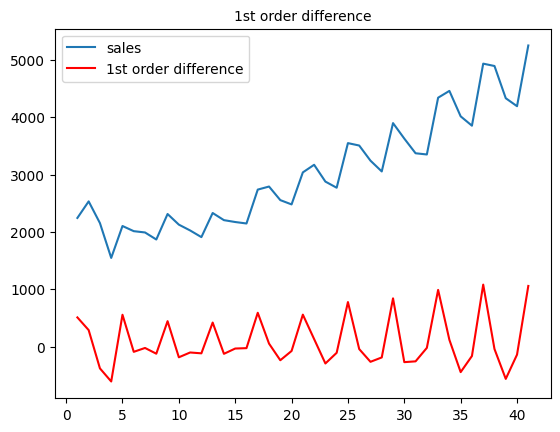

In [32]:
## plot
plt.title("1st order difference", size=10)
plt.plot(df['Sales'], label='sales')
plt.plot(df['diff_sales'], label = '1st order difference', color='red')
plt.legend()

In [33]:
## calculate autocorrelation
acf_values = acf(df['diff_sales'])
np.round(acf_values,2)

array([ 1.  , -0.13, -0.58, -0.14,  0.77, -0.15, -0.45, -0.09,  0.64,
       -0.11, -0.37, -0.09,  0.54, -0.14, -0.34, -0.04,  0.48])

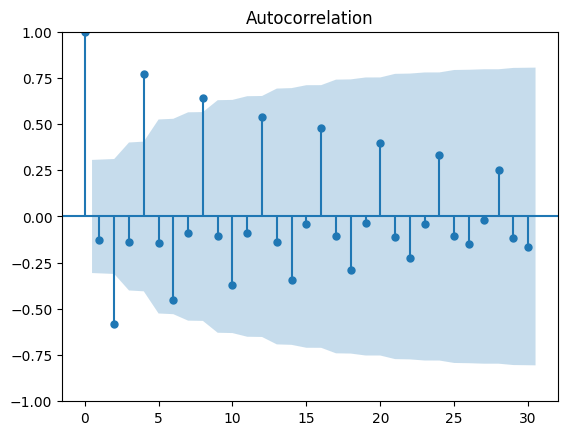

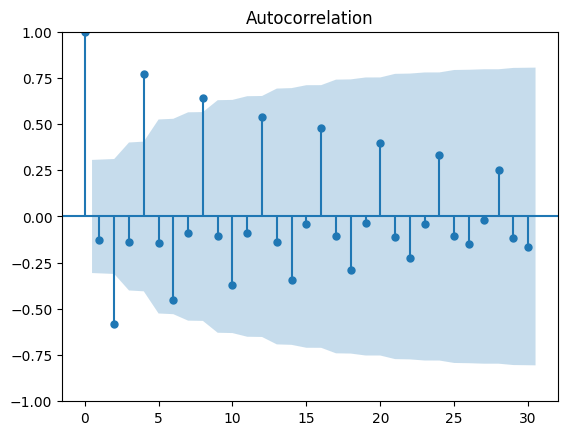

In [34]:
## plot ACF
plot_acf(df['diff_sales'], lags=30)
## shadeed region is standard error region
## 1st values wil be 1 always

## in december peoples like to travel after 12 moths there is grow in numbers

### Partial Autocorrealtion Function

In [ ]:
## PACF

In [35]:
## calculate pacf
## it will give direct values
pacf_values = pacf(df['diff_sales'])
np.round(pacf_values,2)

array([ 1.  , -0.13, -0.64, -0.63,  0.59, -0.4 ,  0.1 , -0.08,  0.18,
        0.21, -0.01,  0.06,  0.3 , -0.48, -0.13,  0.02, -0.29])

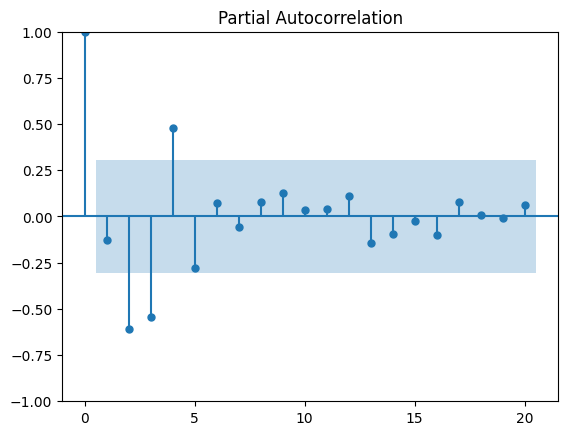

In [37]:
## plot pacf
plot_pacf(df['diff_sales'], lags=20);

build the model

In [ ]:
## models like
## Linear model
## exponential model
## Quadratic model
## Additive model
## Additive seasonality model
## Multiplicative model

## depends on curve of the data
## calculate rmse values

In [ ]:
## in my airline data set there is no t value and log value and squared values so i have to get
## ready my data with the help of excel and formulas and the applied one hot encodeing in python

In [52]:
## lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df1 = pd.read_csv('/content/coke_utf.csv')

# Create dummy variables for the "Month" column
month_dummies = pd.get_dummies(df1["Quarter"], drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df1 = pd.concat([df1, month_dummies], axis=1)

# Print the first five rows of the new DataFrame
print(df1.head())
## i have taken google colab ai help for this code

In [47]:
df1.head()

,Quarter,Sales,log_coke,t,t_squared,quarter,year,Q1_86,Q1_87,Q1_88,...,Q4_86,Q4_87,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df1.rename(columns={'Quarter.1':'quarter'}, inplace=True)

In [42]:
df1.rename(columns={'Unnamed: 8':'null'}, inplace=True)

In [46]:
df1 = df1.drop('null', axis=1)

In [48]:
df1.shape

(42, 49)

In [49]:
import re

for col in df1.columns:
  if re.match(r'^[A-Z][a-z]+-\d{2}$', col):
    new_col = re.sub(r'-\d{2}$', '', col)
    df1.rename(columns={col: new_col}, inplace=True)

df1.head()

,Quarter,Sales,log_coke,t,t_squared,quarter,year,Q1_86,Q1_87,Q1_88,...,Q4_86,Q4_87,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
for col in df1.columns[7:]:
  df1.rename(columns={col: col.replace('Q', '')}, inplace=True)

df1.head()


,Quarter,Sales,log_coke,t,t_squared,quarter,year,1_86,1_87,1_88,...,4_86,4_87,4_88,4_89,4_90,4_91,4_92,4_93,4_94,4_95
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# prompt: df1.iloc[:, 7:] from this data frame rename column names from 1_68 like this to 86

df1.columns = df1.columns.str.replace('1_', '')

df1.head()


,Quarter,Sales,log_coke,t,t_squared,quarter,year,86,87,88,...,4_86,4_87,4_88,4_89,4_90,4_91,4_92,4_93,4_94,4_95
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df1.iloc[:, 7:]

,86,87,88,89,90,91,92,93,94,95,...,4_86,4_87,4_88,4_89,4_90,4_91,4_92,4_93,4_94,4_95
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


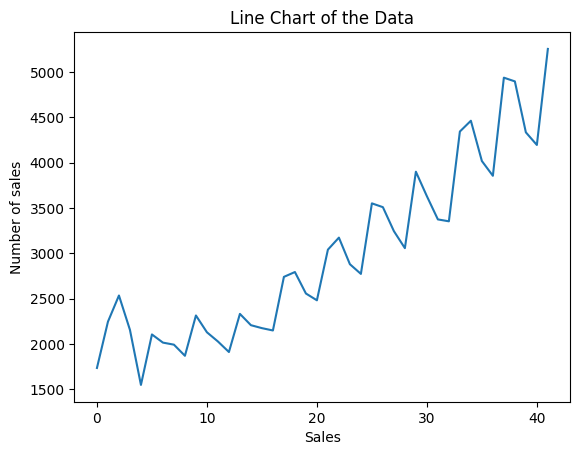

In [50]:
df1['Sales'].plot()
plt.title('Line Chart of the Data')
plt.xlabel('Sales')
plt.ylabel('Number of sales')
plt.show()

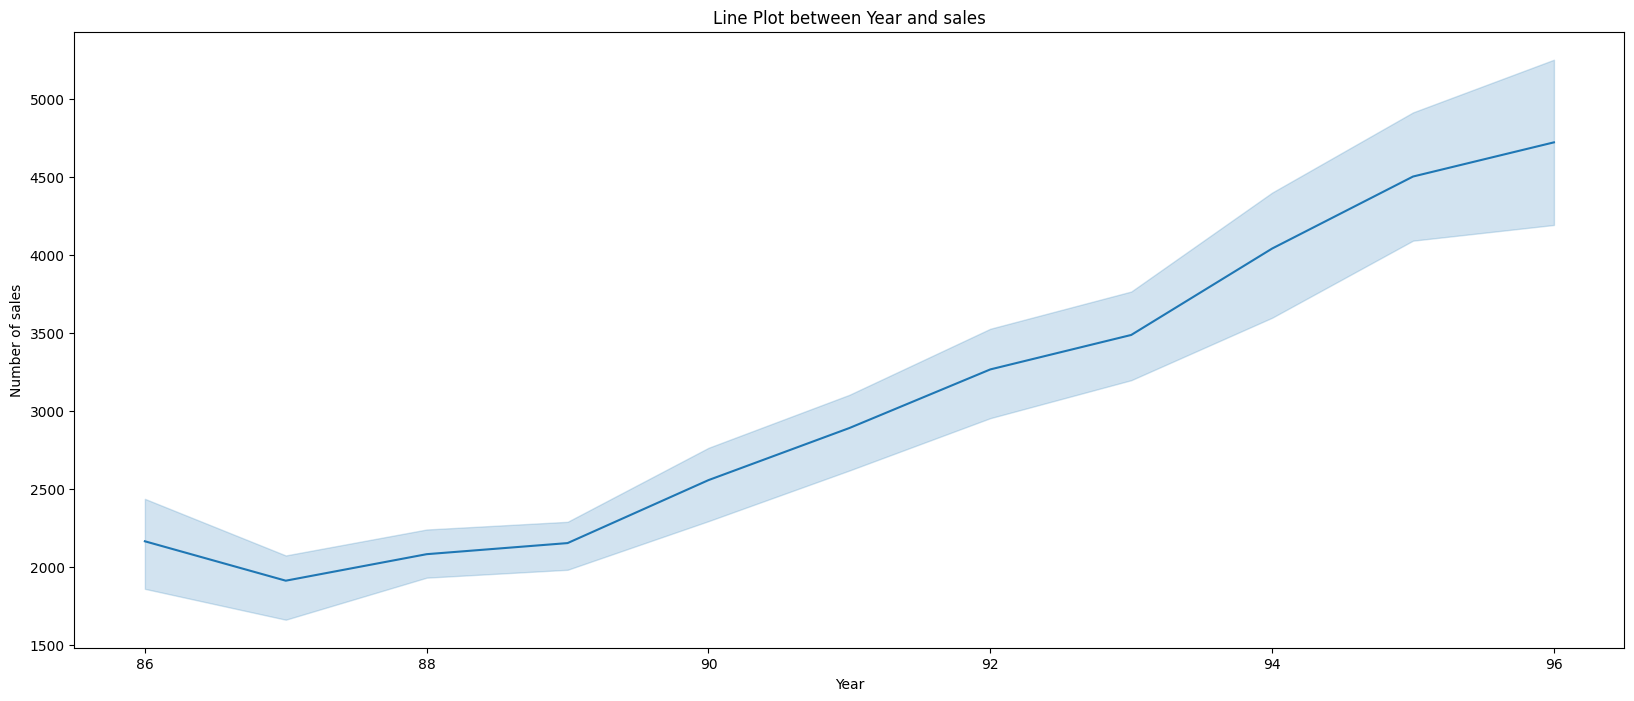

In [53]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=df1, x="year", y="Sales")
plt.title('Line Plot between Year and sales')
plt.xlabel('Year')
plt.ylabel('Number of sales')
plt.show()
## there is a increasing trend in sales by the time

In [ ]:
## my data is following linearly raising trend is there

### Data splitting

In [54]:
df1.shape

(42, 49)

In [93]:
## split the data
## random spliting or sequential
## in forecasting we do sequential spliting
train = df2.head(32)
test = df2.tail(10)

In [56]:
train

,Quarter,Sales,log_coke,t,t_squared,quarter,year,Q1_86,Q1_87,Q1_88,...,Q4_86,Q4_87,Q4_88,Q4_89,Q4_90,Q4_91,Q4_92,Q4_93,Q4_94,Q4_95
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Q2_87,2104.411995,3.323131,2,4,Q2,87,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Q3_87,2014.362999,3.304138,3,9,Q3,87,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Q4_87,1991.746998,3.299234,4,16,Q4,87,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,Q1_88,1869.049999,3.271621,1,1,Q1,88,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Q2_88,2313.631996,3.364294,2,4,Q2,88,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
## find rmse =  we dont have direct function rmse but we have mean squared error
## calculate mean square error and root of mean square error for rmse
from sklearn.metrics import mean_squared_error
## best model = minimum values which gives

In [58]:
## linear model
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales~t', data=train).fit()  ## we are predcting for months pass is our dependent on t month
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))
rmse_linear = np.sqrt(mean_squared_error(test['Sales'], pred_linear))
rmse_linear

1889.7040276199962

In [59]:
## Exponential model
## insted of pass we will take log values of pass.
exp = smf.ols('log_coke~t', data=train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(mean_squared_error(test['Sales'], pred_exp))
rmse_exp

4392.795704910723

In [60]:
## Quadratic model
quad = smf.ols('Sales~t+t_squared', data=train).fit()
pred_quad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_squared']])))
rmse_quad = np.sqrt(mean_squared_error(test['Sales'], pred_quad))  ## y variable is pass
rmse_quad

1857.7237160021978

In [61]:
df1.columns

Index(['Quarter', 'Sales', 'log_coke', 't', 't_squared', 'quarter', 'year',
       'Q1_86', 'Q1_87', 'Q1_88', 'Q1_89', 'Q1_90', 'Q1_91', 'Q1_92', 'Q1_93',
       'Q1_94', 'Q1_95', 'Q1_96', 'Q2_86', 'Q2_87', 'Q2_88', 'Q2_89', 'Q2_90',
       'Q2_91', 'Q2_92', 'Q2_93', 'Q2_94', 'Q2_95', 'Q2_96', 'Q3_86', 'Q3_87',
       'Q3_88', 'Q3_89', 'Q3_90', 'Q3_91', 'Q3_92', 'Q3_93', 'Q3_94', 'Q3_95',
       'Q4_86', 'Q4_87', 'Q4_88', 'Q4_89', 'Q4_90', 'Q4_91', 'Q4_92', 'Q4_93',
       'Q4_94', 'Q4_95'],
      dtype='object')

In [80]:
df2 = pd.read_csv("/content/pra_imp.csv")

In [83]:
df2.head()

,Quarter,Sales,log_coke,t,t_squared,quarter,year,Q1,Q1.1,Q1.2,...,Q4,Q4.1,Q4.2,Q4.3,Q4.4,Q4.5,Q4.6,Q4.7,Q4.8,Q4.9
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,1,0,88,...,86,87,88,89,90,91,92,93,94,95
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [87]:
df2.columns

Index(['Quarter', 'Sales', 'log_coke', 't', 't_squared', 'quarter', 'year',
       'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q1', 'Q2',
       'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3',
       'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4', 'Q4', 'Q4',
       'Q4', 'Q4', 'Q4', 'Q4', 'Q4', 'Q4'],
      dtype='object')

In [85]:
df2.columns = df2.columns.str.split('.').str[0]

In [86]:
df2

,Quarter,Sales,log_coke,t,t_squared,quarter,year,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,1,0,88,...,86,87,88,89,90,91,92,93,94,95
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Q2_87,2104.411995,3.323131,2,4,Q2,87,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Q3_87,2014.362999,3.304138,3,9,Q3,87,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Q4_87,1991.746998,3.299234,4,16,Q4,87,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,Q1_88,1869.049999,3.271621,1,1,Q1,88,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Q2_88,2313.631996,3.364294,2,4,Q2,88,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2

In [89]:
train

,Quarter,Sales,log_coke,t,t_squared,quarter,year,Q1,Q1,Q1,...,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4,Q4
0,Q1_86,1734.827000,3.239256,1,1,Q1,86,1,0,88,...,86,87,88,89,90,91,92,93,94,95
1,Q2_86,2244.960999,3.351209,2,4,Q2,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Q3_86,2533.804993,3.403773,3,9,Q3,86,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Q4_86,2154.962997,3.333440,4,16,Q4,86,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Q1_87,1547.818996,3.189720,1,1,Q1,87,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,Q2_87,2104.411995,3.323131,2,4,Q2,87,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Q3_87,2014.362999,3.304138,3,9,Q3,87,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Q4_87,1991.746998,3.299234,4,16,Q4,87,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,Q1_88,1869.049999,3.271621,1,1,Q1,88,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,Q2_88,2313.631996,3.364294,2,4,Q2,88,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
## Additive seasonality model - pass monthly data Q1 to Q4
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4', data=train).fit()

In [94]:
pred_add_sea = pd.Series(add_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))  ## predcting values upon months data

In [95]:
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Sales'],pred_add_sea))
rmse_add_sea_quad

2.2737367544323206e-12

In [96]:
## Additive seasonality quadratic model ## just usig t and t squred value
add_sea = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4', data=train).fit()

In [99]:
pred_add_sea_quad = pd.Series(add_sea.predict(pd.DataFrame(test[['t','t_squared','Q1','Q2','Q3','Q4']])))  ## predcting values upon months data

In [100]:
rmse_add_sea_quad = np.sqrt(mean_squared_error(test['Sales'],pred_add_sea_quad))
rmse_add_sea_quad

1.460751555926534e-10

In [101]:
## multiplicative seasonality
mul_sea = smf.ols('log_coke~Q1+Q2+Q3+Q4', data=train).fit()

In [103]:
pred_mul_sea = pd.Series(mul_sea.predict(test[['Q1','Q2','Q3','Q4']]))

In [104]:
rmse_mul_sea = np.sqrt(mean_squared_error(test['Sales'], pred_mul_sea))
rmse_mul_sea

3321.465888962052

In [ ]:
### we get low in Additive seasonality quadratic model ## just usig t and t squred value

In [105]:
## compare the results

data = {"model":pd.Series(['linear','exponential','quadratic','additive seasonality','additive seas quad','multi seas']),
            "rmse_values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea_quad,rmse_add_sea_quad,rmse_mul_sea])}
tabel_rmse=pd.DataFrame(data)
tabel_rmse.sort_values(["rmse_values"])

,model,rmse_values
3,additive seasonality,1.460752e-10
4,additive seas quad,1.460752e-10
2,quadratic,1.857724e+03
0,linear,1.889704e+03
5,multi seas,3.321466e+03
1,exponential,4.392796e+03
